In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from copy import deepcopy
from tqdm import tqdm
from PIL import Image


In [2]:
path = 'CyberextruderUltimate/'
pics = []

for path, subdirs, files in os.walk(path):
    for name in files:
        if name.endswith('000001.jpg'):
            pics.append(os.path.join(path, name))

In [29]:
pics = sorted(pics)
pics[:3]

['CyberextruderUltimate/000001/000001.jpg',
 'CyberextruderUltimate/000002/000001.jpg',
 'CyberextruderUltimate/000003/000001.jpg']

In [30]:
PIC_SIZE = 100

img = Image.open(pics[0])
new_img = img.resize((PIC_SIZE,PIC_SIZE))
new_img = np.array(new_img)
new_img.shape

(100, 100, 3)

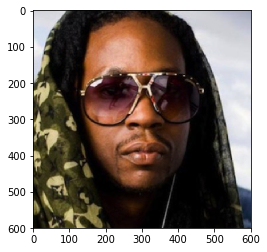

In [31]:
img_1 = new_img[:,:,0]
plt.imshow(img)

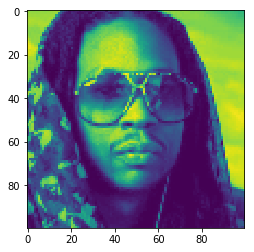

In [32]:
plt.imshow(img_1)

In [33]:
img_1.reshape(-1,1)[:,0].shape

(10000,)

In [34]:
imgs_reshaped = np.zeros((img_1.shape[0] ** 2, len(pics)))
imgs_reshaped.shape

(10000, 1000)

In [35]:
for i in tqdm(range(len(pics))):
    img = Image.open(pics[i])
    new_img = img.resize((PIC_SIZE,PIC_SIZE))
    new_img = np.array(new_img)
    imgs_reshaped[:,i] = new_img[:,:,0].reshape(-1,1)[:,0]

100%|██████████| 1000/1000 [00:07<00:00, 136.17it/s]


In [36]:
np.array_equal(imgs_reshaped[:,0], np.array(Image.open(pics[0]).resize((PIC_SIZE,PIC_SIZE)))[:,:,0].reshape(-1,1)[:,0])

True

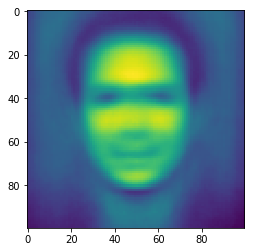

In [37]:
mean_img = np.mean(imgs_reshaped, axis=1)
plt.imshow(mean_img.reshape((PIC_SIZE,PIC_SIZE)))

In [38]:
A = deepcopy(imgs_reshaped)

for i in tqdm(range(A.shape[1])):
    A[:,i] -= mean_img

100%|██████████| 1000/1000 [00:00<00:00, 9979.22it/s]


In [39]:
np.array_equal(A[:,0] + mean_img, imgs_reshaped[:,0])

True

In [40]:
%%time
U, E, V = np.linalg.svd(A)

CPU times: user 1min 50s, sys: 1.72 s, total: 1min 52s
Wall time: 20.2 s


In [41]:
U.shape, E.shape, V.shape

((10000, 10000), (1000,), (1000, 1000))

In [42]:
nonzero = len(E[E != 0])
nonzero

1000

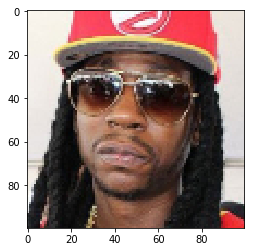

In [50]:
newpath = pics[0].replace('1.jpg', '3.jpg')
img = Image.open(newpath)
new_img = img.resize((PIC_SIZE,PIC_SIZE))
new_img = np.array(new_img)
plt.imshow(new_img)

In [51]:
new_img = new_img[:,:,0].reshape(-1,1)[:,0]
new_img.shape

(10000,)

In [55]:
sub_U = U[:,:nonzero]

x = sub_U.T @ (new_img - mean_img)
x.shape

(1000,)

In [56]:
minn = np.inf

for i in range(len())

In [57]:
sub_U.shape

(10000, 1000)